In [0]:
"/Volumes/workspace/default/netflix/netflix_analysis.csv"

'/Volumes/workspace/default/netflix/netflix_analysis.csv'

In [0]:
import pandas as pd
df = pd.read_csv("/Volumes/workspace/default/netflix/netflix_analysis.csv")
df.shape
df.head()

show_id  ...                                        description
0      s1  ...  As her father nears the end of his life, filmm...
1      s2  ...  After crossing paths at a party, a Cape Town t...
2      s3  ...  To protect his family from a powerful drug lor...
3      s4  ...  Feuds, flirtations and toilet talk go down amo...
4      s5  ...  In a city of coaching centers known to train I...

[5 rows x 12 columns]

## Cleaning the dataset 

- ### Remove Duplicates

In [0]:
df.info()
df = df.drop_duplicates()
df = df.drop_duplicates(subset=['title','release_year'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- ### Handle Missing Values

In [0]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2633
cast             825
country          830
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [0]:
for col in ['director', 'cast', 'country', 'rating']:
    df[col] = df[col].fillna("Unknown")

In [0]:
#fixing todatetime format 
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [0]:
#binary column
df['date_missing'] = df['date_added'].isna().astype(int)

In [0]:
# Breaks columns with multiple value into multiple rows.
df_exploded = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()

In [0]:
# Handling Outliers
df['duration'] = df['duration'].str.replace(' min', '').str.replace(' Season[s]?', '', regex=True)

In [0]:
import pandas as pd
df_cleaned = pd.read_csv("/Volumes/workspace/default/netflix/cleaned_netflix.csv")
df_cleaned.head()


show_id  ... date_missing
0      s1  ...            0
1      s2  ...            0
2      s3  ...            0
3      s4  ...            0
4      s5  ...            0

[5 rows x 13 columns]

In [0]:
type(df_cleaned)


pandas.core.frame.DataFrame

In [0]:
cleaned_file_path = "/Volumes/workspace/default/netflix/cleaned_netflix.csv"
df.to_csv(cleaned_file_path, index=False)

### **Normalize Categorical Features**

In [0]:
#no extra spaces
df_cleaned = df.copy()
df_cleaned['type'] = df_cleaned['type'].str.strip()

In [0]:
# Rating based on Age Group
rating_map = {
    'G': 'Kids', 'TV-Y': 'Kids', 'TV-G': 'Kids',
    'PG': 'Family', 'TV-PG': 'Family', 'TV-Y7': 'Family', 'TV-Y7-FV': 'Family',
    'PG-13': 'Teens', 'TV-14': 'Teens',
    'R': 'Adults', 'NC-17': 'Adults', 'TV-MA': 'Adults'
}

df_cleaned['rating_group'] = df_cleaned['rating'].map(rating_map).fillna('Unknown')
df_cleaned.display()

show_id type title director cast country date_added release_year rating duration listed_in description date_missing rating_group s1 Movie Dick Johnson Is Dead Kirsten Johnson Unknown United States 2021-09-25T00:00:00.000Z 2020 PG-13 90 Documentaries As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable. 0 Teens s2 TV Show Blood & Water Unknown Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng South Africa 2021-09-24T00:00:00.000Z 2021 TV-MA 2 International TV Shows, TV Dramas, TV Mysteries After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth. 0 Adults s3 TV Show Ganglands Julien Leclercq Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera Unknown 2021-09-24T00:00:00.000Z 2021 TV-MA 1 Crime TV Shows, International TV Shows, TV Action & Adventure To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war. 0 Adults s4 TV Show Jailbirds New Orleans Unknown Unknown Unknown 2021-09-24T00:00:00.000Z 2021 TV-MA 1 Docuseries, Reality TV Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series. 0 Adults s5 TV Show Kota Factory Unknown Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar India 2021-09-24T00:00:00.000Z 2021 TV-MA 2 International TV Shows, Romantic TV Shows, TV Comedies In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life. 0 Adults s6 TV Show Midnight Mass Mike Flanagan Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver Unknown 2021-09-24T00:00:00.000Z 2021 TV-MA 1 TV Dramas, TV Horror, TV Mysteries The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe. 0 Adults s7 Movie My Little Pony: A New Generation Robert Cullen, José Luis Ucha Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr Unknown 2021-09-24T00:00:00.000Z 2021 PG 91 Children & Family Movies Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it. 0 Family s8 Movie Sankofa Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia 2021-09-24T00:00:00.000Z 1993 TV-MA 125 Dramas, Independent Movies, International Movies On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past. 0 Adults s9 TV Show The Great British Baking Show Andy Devonshire Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood United Kingdom 2021-09-24T00:00:00.000Z 2021 TV-14 9 British TV Shows, Reality TV A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best. 0 Teens s10 Movie The Starling Theodore Melfi Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, 

In [0]:
# standard naming
df_cleaned['country'] = df_cleaned['country'].replace({'USA': 'United States'})


In [0]:
# Converts categories into binary (One-Hot Encoding)
pd.get_dummies(df_cleaned['type'], prefix='type')

type_Movie  type_TV Show
0              1             0
1              0             1
2              0             1
3              0             1
4              0             1
...          ...           ...
8802           1             0
8803           0             1
8804           1             0
8805           1             0
8806           1             0

[8804 rows x 2 columns]

In [0]:
# frequency encoding on the director column
director_freq = df_cleaned['director'].value_counts()
df_cleaned['director_encoded'] = df_cleaned['director'].map(director_freq)
print(df_cleaned[['director', 'director_encoded']].head(10))

                        director  director_encoded
0                Kirsten Johnson                 1
1                        Unknown              2633
2                Julien Leclercq                 3
3                        Unknown              2633
4                        Unknown              2633
5                  Mike Flanagan                 4
6  Robert Cullen, José Luis Ucha                 1
7                   Haile Gerima                 1
8                Andy Devonshire                 1
9                 Theodore Melfi                 1


In [0]:
# ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
rating_order = [['Kids', 'Family', 'Teens', 'Adults', 'Unknown']]
oe = OrdinalEncoder(categories=rating_order)
df_cleaned['rating_group_encoded'] = oe.fit_transform(df_cleaned[['rating_group']])
print(df_cleaned[['rating_group', 'rating_group_encoded']].head(10))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xff651eb9e020>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


  rating_group  rating_group_encoded
0        Teens                   2.0
1       Adults                   3.0
2       Adults                   3.0
3       Adults                   3.0
4       Adults                   3.0
5       Adults                   3.0
6       Family                   1.0
7       Adults                   3.0
8        Teens                   2.0
9        Teens                   2.0


In [0]:
# Grouping Rare Categories to avoid noise
rare_countries = df_cleaned['country'].value_counts()[df_cleaned['country'].value_counts()<20].index
df_cleaned['country'] = df_cleaned['country'].replace(rare_countries, 'Other')

In [0]:
normalized_file_path = "/Volumes/workspace/default/netflix/normalized_netflix.csv"
df_normalized = df_cleaned.copy()

In [0]:
df_normalized.to_csv(normalized_file_path, index=False)
print(f"Normalized dataset saved at: {normalized_file_path}")

Normalized dataset saved at: /Volumes/workspace/default/netflix/normalized_netflix.csv


### **EDA Basics**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
# style for better visuals
sns.set(style="whitegrid")

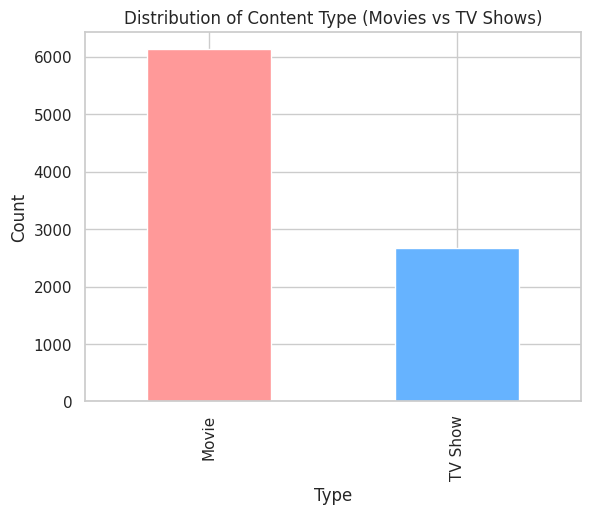

In [0]:
# Movies vs TV Shows
df_cleaned['type'].value_counts().plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

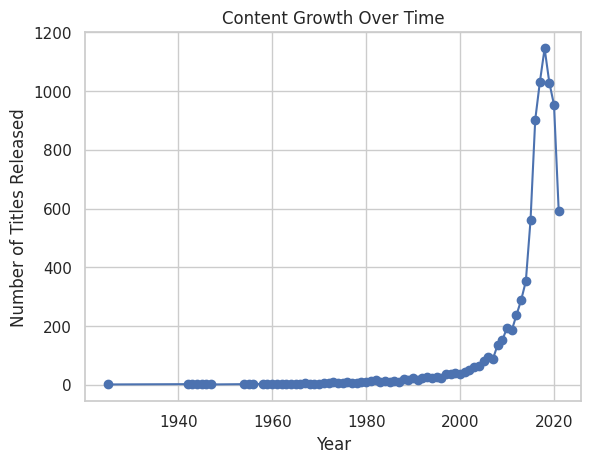

In [0]:
# trend of Netflix content released per year
content_per_year = df_cleaned['release_year'].value_counts().sort_index()
content_per_year.plot(kind='line', marker='o')
plt.title("Content Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.show()


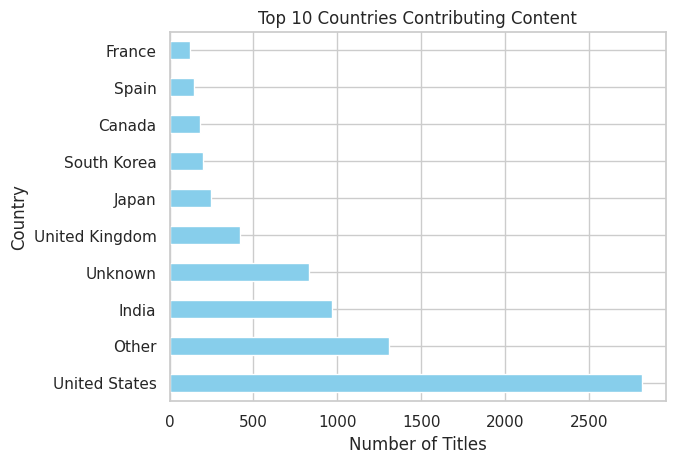

In [0]:
# Top 10 Countries with Most Content
top_countries = df_cleaned['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

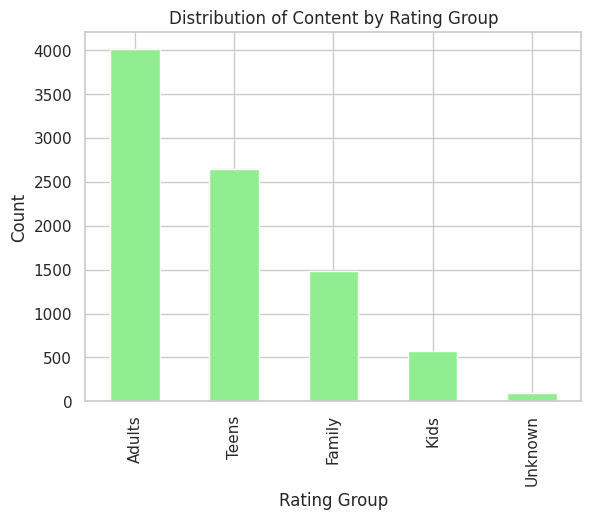

In [0]:
# Distribution of Ratings 
df_cleaned['rating_group'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Distribution of Content by Rating Group")
plt.xlabel("Rating Group")
plt.ylabel("Count")
plt.show()

In [0]:
# First and Latest Show Release
print("Earliest Release Year:", df_cleaned['release_year'].min())
print("Most Recent Release Year:", df_cleaned['release_year'].max())

Earliest Release Year: 1925
Most Recent Release Year: 2021


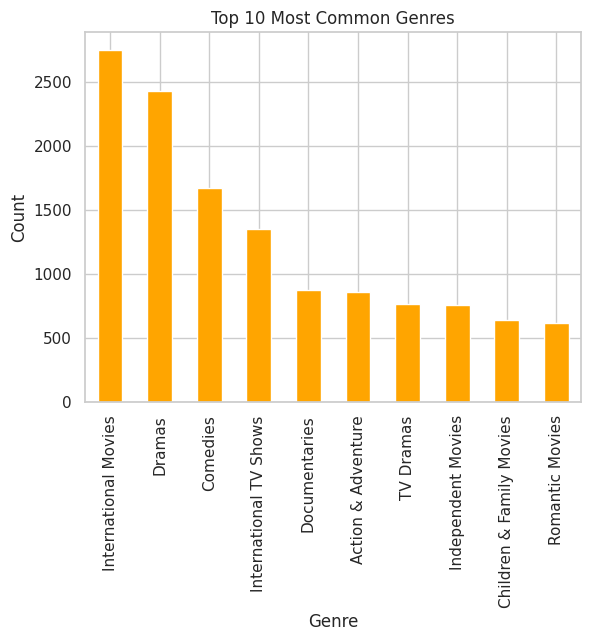

In [0]:
# Top 10 Most Common Genres
top_genres = df_exploded['genre'].value_counts().head(10)
top_genres.plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()